###**SHETH L.U.J. & SIR M.V. COLLEGE**

Vedant Patil | T101

Practical No. 9

Aim: Principal Component Analysis (PCA)


*   Perform PCA on a dataset to reduce dimensionality.
*   Evaluate the explained variance and select the appropriate number of principal
components.

*    Visualize the data in the reduced-dimensional space.








In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# --- Data Loading and Preparation ---
df = pd.read_csv('/content/Sample - Superstore.csv', encoding='latin1')
features = ['Sales', 'Quantity', 'Discount', 'Profit']
X = df[features].values
y = df['Segment'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
segments = np.unique(y) # Unique classes for plotting, now correctly assigned

print(f"Original number of features: {X.shape[1]}")
print(f"Target classes (Segments): {segments}")
print("\n" + "="*50)

Original number of features: 4
Target classes (Segments): ['Consumer' 'Corporate' 'Home Office']



Part 1: Principal Component Analysis (PCA) for Your Dataset

In [21]:
print("Part 1: Principal Component Analysis (PCA)")
print("="*50)

# Reduce to 2 Principal Components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Reduced number of features (PCA): {X_pca.shape[1]}")
print("Explained variance ratio by components (PCA):")
print(pca.explained_variance_ratio_)
print(f"Total Explained Variance (2 components): {pca.explained_variance_ratio_.sum():.4f}")

Part 1: Principal Component Analysis (PCA)
Reduced number of features (PCA): 2
Explained variance ratio by components (PCA):
[0.39749164 0.26467547]
Total Explained Variance (2 components): 0.6622


Part 2: Kernel PCA (for Nonlinear Data)

In [19]:
print("Part 2: Kernel Principal Component Analysis (KPCA)")
print("="*50)

# Use the standardized data (X_scaled). 'rbf' is the standard non-linear kernel.
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1) # Gamma controls the influence of a single training example
X_kpca = kpca.fit_transform(X_scaled)

print(f"Reduced number of features (KPCA): {X_kpca.shape[1]}")
print("Note: Explained variance is not straightforwardly calculated in Kernel PCA.")
print(X_kpca[:5]) # Display first 5 rows

Part 2: Kernel Principal Component Analysis (KPCA)
Reduced number of features (KPCA): 2
Note: Explained variance is not straightforwardly calculated in Kernel PCA.
[[-0.35439741 -0.00654421]
 [-0.13739954 -0.14237294]
 [-0.37130624  0.00837999]
 [ 0.48339759  0.23602282]
 [-0.21098553  0.24897674]]


Part 3: Linear Discriminant Analysis (LDA) for Feature Reduction


Part 3: Linear Discriminant Analysis (LDA)
Reduced number of features (LDA): 1
Explained variance ratio by component (LDA):
[0.60512934]
Total Explained Variance (1 component): 0.6051


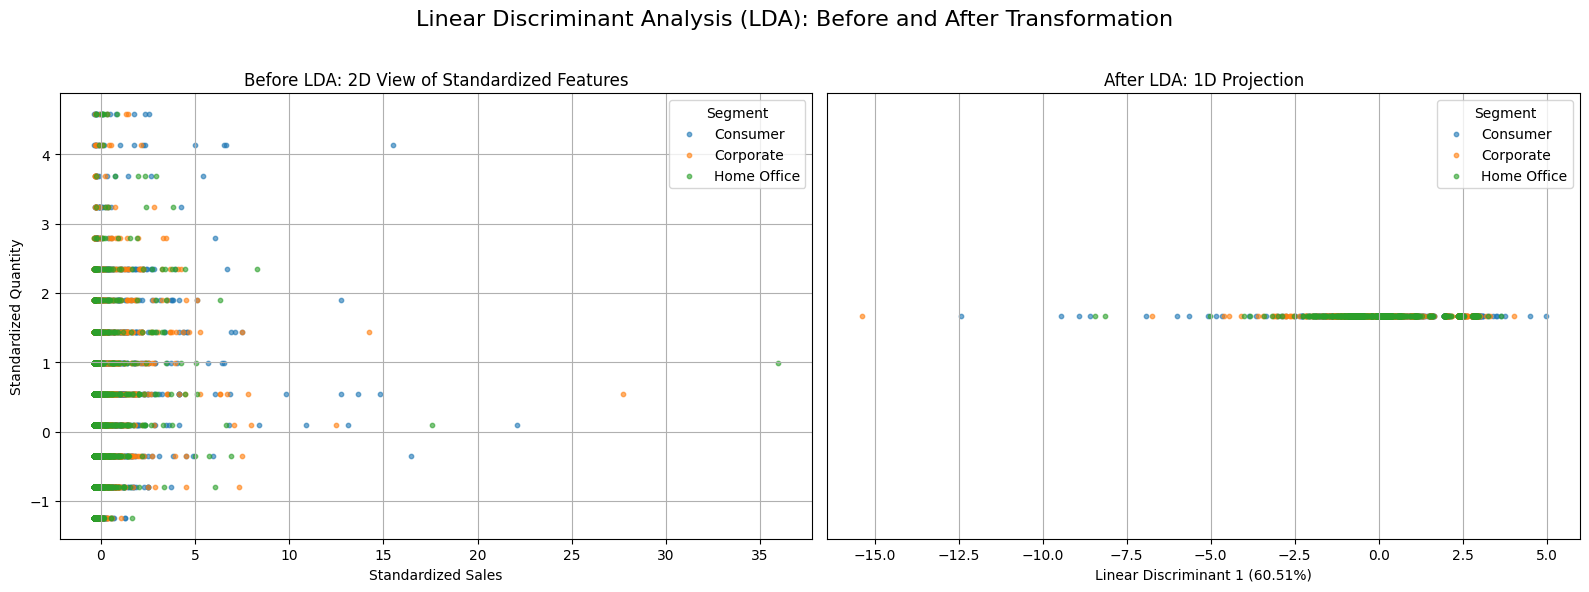

In [22]:
print("\n" + "="*50)
print("Part 3: Linear Discriminant Analysis (LDA)")
print("="*50)

# Reduce to 1 Linear Discriminant as per the original notebook example
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

print(f"Reduced number of features (LDA): {X_lda.shape[1]}")
print("Explained variance ratio by component (LDA):")
print(lda.explained_variance_ratio_)
print(f"Total Explained Variance (1 component): {lda.explained_variance_ratio_.sum():.4f}")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
plt.suptitle('Linear Discriminant Analysis (LDA): Before and After Transformation', fontsize=16)

# --- Subplot 1: "Before" LDA (2D View of Standardized Features) ---
# We plot two standardized features (Sales vs. Quantity) to show the initial, overlapping state.
feature_names = ['Sales', 'Quantity', 'Discount', 'Profit']
feature_index_1 = 0
feature_index_2 = 1

for segment in segments:
    ax1.scatter(
        X_scaled[y == segment, feature_index_1],
        X_scaled[y == segment, feature_index_2],
        label=segment,
        alpha=0.6,
        s=10
    )

ax1.set_xlabel(f'Standardized {feature_names[feature_index_1]}')
ax1.set_ylabel(f'Standardized {feature_names[feature_index_2]}')
ax1.set_title(f'Before LDA: 2D View of Standardized Features')
ax1.legend(title='Segment')
ax1.grid(True)
#

# --- Subplot 2: "After" LDA (1D Projection) ---
y_zeros = np.zeros_like(X_lda)

for segment in segments:
    # Plot the 1D LDA score against a constant y-value to visualize separation
    ax2.scatter(
        X_lda[y == segment, 0],
        y_zeros[y == segment],
        label=segment,
        alpha=0.6,
        s=10
    )

ax2.set_xlabel(f'Linear Discriminant 1 ({ld1_exp_var:.2f}%)')
ax2.set_title('After LDA: 1D Projection')
ax2.set_yticks([]) # Remove y-axis ticks
ax2.legend(title='Segment')
ax2.grid(axis='x')
ax2.set_ylim([-1, 1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Visualization: Before and After Transformation

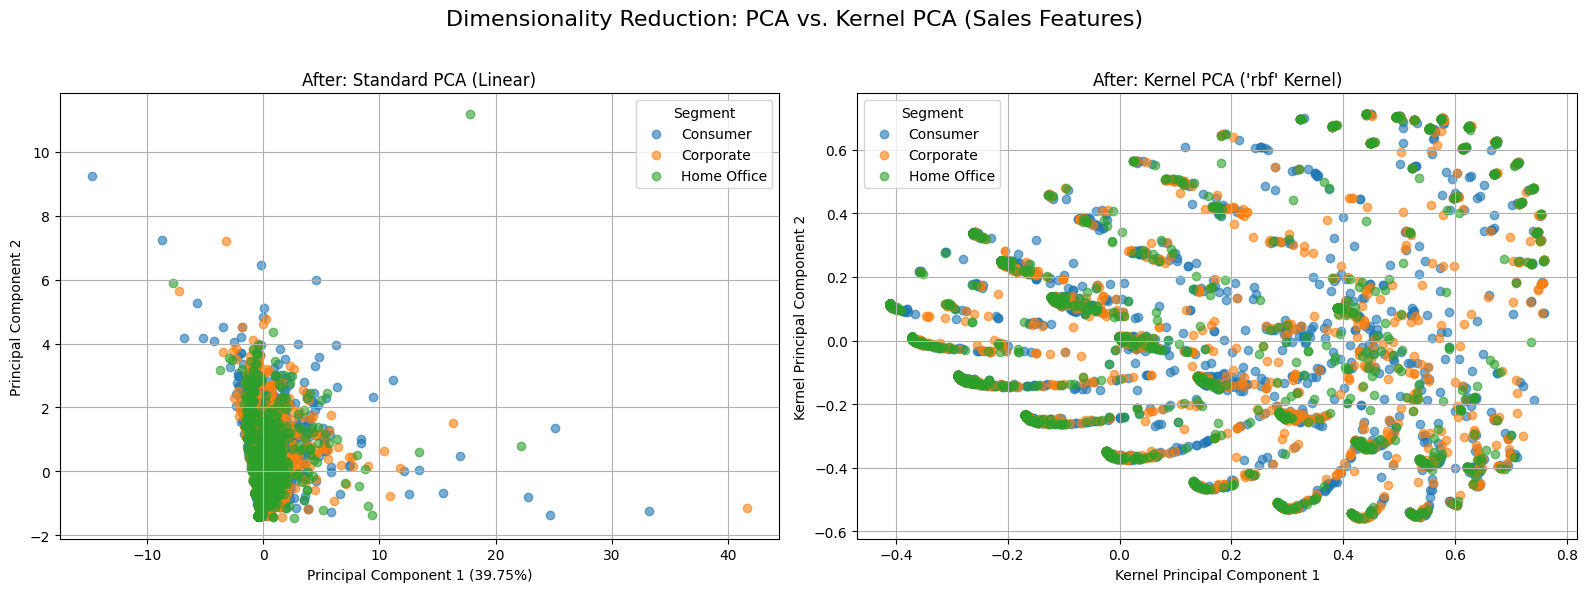

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
plt.suptitle('Dimensionality Reduction: PCA vs. Kernel PCA (Sales Features)', fontsize=16)

# --- PCA Plot (Linear) ---
for segment in segments:
    ax1.scatter(X_pca[y == segment, 0], X_pca[y == segment, 1], label=segment, alpha=0.6)

pc1_exp_var = pca.explained_variance_ratio_[0]*100
ax1.set_xlabel(f'Principal Component 1 ({pc1_exp_var:.2f}%)')
ax1.set_ylabel('Principal Component 2')
ax1.set_title('After: Standard PCA (Linear)')
ax1.legend(title='Segment')
ax1.grid(True)

# --- KPCA Plot (Non-Linear) ---
for segment in segments:
    ax2.scatter(X_kpca[y == segment, 0], X_kpca[y == segment, 1], label=segment, alpha=0.6)

ax2.set_xlabel('Kernel Principal Component 1')
ax2.set_ylabel('Kernel Principal Component 2')
ax2.set_title("After: Kernel PCA ('rbf' Kernel)")
ax2.legend(title='Segment')
ax2.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()